In [1]:
import requests
import json
import pandas as pd

# URL of the API endpoint
url = 'https://api.eia.gov/v2/natural-gas/cons/sum/data/?frequency=monthly&data[0]=value&facets[series][]=N3035CA2&start=2001-01&end=2021-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
key = '&api_key=8xNK4ZUY1ytwwRGuo13tpKqrnN6SXQuD5etbnHBm'

url = url + key
print(url)
# Custom headers as specified
headers = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "series": [
            "N3035CA2"
        ]
    },
    "start": "2001-01",
    "end": "2021-01",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}
headers = {
    'X-Params': json.dumps(headers)
}



# Send a GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    df = pd.DataFrame(data['response']['data'])
    # print(json.dumps(data, indent=4))
    print('data extracted successfully.')
else:
    print(f"Failed to retrieve data: {response.status_code} - {response.text}")



https://api.eia.gov/v2/natural-gas/cons/sum/data/?frequency=monthly&data[0]=value&facets[series][]=N3035CA2&start=2001-01&end=2021-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=8xNK4ZUY1ytwwRGuo13tpKqrnN6SXQuD5etbnHBm
data extracted successfully.


In [2]:
df

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2020-12,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,59505,MMCF
1,2020-11,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,56710,MMCF
2,2020-10,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,57694,MMCF
3,2020-09,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,62461,MMCF
4,2020-08,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,61321,MMCF
...,...,...,...,...,...,...,...,...,...,...,...
235,2001-05,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,51398,MMCF
236,2001-04,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,50003,MMCF
237,2001-03,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,46193,MMCF
238,2001-02,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,49474,MMCF


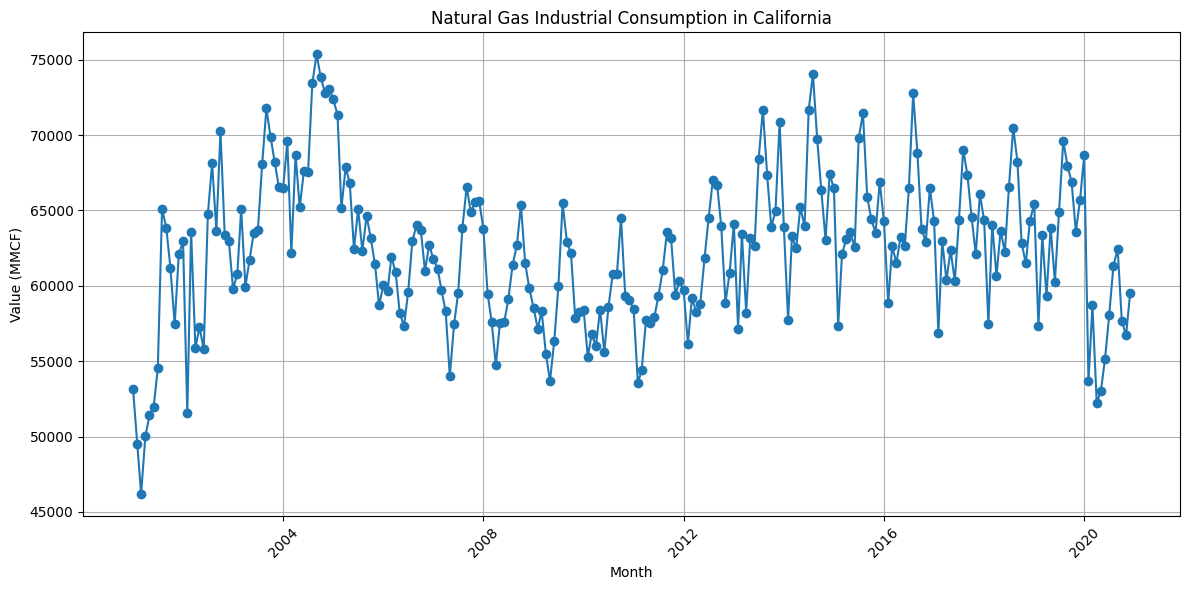

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the loaded data.

# Filter the DataFrame for rows where 'area-name' is 'CALIFORNIA' and the series-description matches.
california_data = df[(df['area-name'] == 'CALIFORNIA') & 
                     (df['series-description'].str.contains('Industrial Consumption'))]

# Convert 'period' to datetime to ensure proper sorting.
california_data['period'] = pd.to_datetime(california_data['period'], format='%Y-%m')

# Convert 'value' column to float to ensure proper plotting.
california_data['value'] = california_data['value'].astype(float)

# Sort the DataFrame based on the 'period' column in ascending order.
california_data_sorted = california_data.sort_values(by='period', ascending=True)

# Plotting the 'value' column against the 'period' column.
plt.figure(figsize=(12, 6))
plt.plot(california_data_sorted['period'], california_data_sorted['value'], marker='o')
plt.title('Natural Gas Industrial Consumption in California')
plt.xlabel('Month')
plt.ylabel('Value (MMCF)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels.

# Show the plot.
plt.show()


In [4]:
california_data_sorted

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
239,2001-01-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,53179.0,MMCF
238,2001-02-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,49474.0,MMCF
237,2001-03-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,46193.0,MMCF
236,2001-04-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,50003.0,MMCF
235,2001-05-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,51398.0,MMCF
...,...,...,...,...,...,...,...,...,...,...,...
4,2020-08-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,61321.0,MMCF
3,2020-09-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,62461.0,MMCF
2,2020-10-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,57694.0,MMCF
1,2020-11-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,56710.0,MMCF


In [22]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        # If there's a ValueError, find the first occurrence of a decimal point
        first_decimal = str(x).find('.')
        if first_decimal != -1:
            # Try to convert the part before the decimal point
            return float(str(x)[:first_decimal])
        raise  # If there's still an error, raise it

import pandas as pd

def normalize_values_by_quarter(df, entry_name='value'):
    # Check if 'period' is the index; if not, set it
    if 'period' not in df.columns:
        df = df.rename_axis('period').reset_index()
    
    # Convert 'period' to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['period']):
        df['period'] = pd.to_datetime(df['period'], errors='coerce')  # Coerce malformed dates to NaN
    
    # Drop rows with missing or malformed data
    df = df.dropna(subset=['period', entry_name])

    # Ensure the value column is numeric
    df[entry_name] = pd.to_numeric(df[entry_name], errors='coerce')
    df = df.dropna(subset=[entry_name])  # Drop rows with non-numeric values

    # Group by year and quarter
    quarterly_groups = df.groupby([df['period'].dt.year, df['period'].dt.quarter])
    
    # Normalize the 'value' column within each group
    quarterly_normalized_df = quarterly_groups[entry_name].transform(lambda x: x / x.mean())
    
    # Add the quarterly normalized values back into the DataFrame
    df['quarterly_normalized_value'] = quarterly_normalized_df

    # Group by year to compute yearly averages
    yearly_groups = df.groupby(df['period'].dt.year)[entry_name]
    yearly_averages = yearly_groups.mean()

    # Calculate the overall average across all years
    overall_average = yearly_averages.mean()

    # Create a mapping of year to its normalization factor (yearly average / overall average)
    yearly_normalization_factors = yearly_averages / overall_average

    # Apply the yearly normalization factor to each entry
    df['normalized_value'] = df.apply(
        lambda row: row['quarterly_normalized_value'] * yearly_normalization_factors[row['period'].year],
        axis=1
    )

    # Create a dictionary with 'year-month' as keys and normalized values as values
    normalized_dict = df.set_index('period')['normalized_value'].to_dict()
    normalized_dict = {k.strftime('%Y-%m'): v for k, v in normalized_dict.items()}

    return normalized_dict

# Example usage:
# df = pd.read_csv('data.csv')  # or wherever you're getting the data from
# normalized_dict = normalize_values_by_quarter(df)


In [23]:
california_data_sorted

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,quarterly_normalized_value,normalized_value
239,2001-01-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,53179.0,MMCF,1.071826,0.955315
238,2001-02-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,49474.0,MMCF,0.997151,0.888758
237,2001-03-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,46193.0,MMCF,0.931023,0.829817
236,2001-04-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,50003.0,MMCF,0.977996,0.871685
235,2001-05-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,51398.0,MMCF,1.005281,0.896003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-08-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,61321.0,MMCF,1.011686,0.943256
3,2020-09-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,62461.0,MMCF,1.030494,0.960792
2,2020-10-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,57694.0,MMCF,0.995245,0.927926
1,2020-11-01,SCA,CALIFORNIA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035CA2,California Natural Gas Industrial Consumption ...,56710.0,MMCF,0.978270,0.912100


In [24]:

gas_monthly_index = normalize_values_by_quarter(california_data_sorted)
with open('gas_monthly_index.json', 'w') as f:
    json.dump(gas_monthly_index, f)

Now for electricity

In [25]:
import requests
import json
import pandas as pd

# URL of the API endpoint
url = 'https://api.eia.gov/v2/electricity/retail-sales/data/?frequency=monthly&data[0]=sales&facets[stateid][]=CA&start=2001-01&end=2020-12&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000'
key = '&api_key=8xNK4ZUY1ytwwRGuo13tpKqrnN6SXQuD5etbnHBm'

url = url + key
print(url)
# Custom headers as specified
headers = {
    "frequency": "monthly",
    "data": [
        "sales"
    ],
    "facets": {
        "stateid": [
            "CA"
        ]
    },
    "start": "2001-01",
    "end": "2020-12",
    "sort": [
        {
            "column": "period",
            "direction": "asc"
        }
    ],
    "offset": 0,
    "length": 5000
}
headers = {
    'X-Params': json.dumps(headers)
}



# Send a GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    df = pd.DataFrame(data['response']['data'])
    # print(json.dumps(data, indent=4))
    print('data extracted successfully.')
else:
    print(f"Failed to retrieve data: {response.status_code} - {response.text}")



https://api.eia.gov/v2/electricity/retail-sales/data/?frequency=monthly&data[0]=sales&facets[stateid][]=CA&start=2001-01&end=2020-12&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000&api_key=8xNK4ZUY1ytwwRGuo13tpKqrnN6SXQuD5etbnHBm
data extracted successfully.


In [26]:
residential_df = df[df['sectorName'] == 'residential']
industrial_df = df[df['sectorName'] == 'industrial']

In [27]:
industrial_df

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
4,2001-01,CA,California,IND,industrial,5815.77103,million kilowatthours
10,2001-02,CA,California,IND,industrial,4715.79261,million kilowatthours
15,2001-03,CA,California,IND,industrial,5914.54295,million kilowatthours
22,2001-04,CA,California,IND,industrial,5247.34233,million kilowatthours
28,2001-05,CA,California,IND,industrial,5525.84378,million kilowatthours
...,...,...,...,...,...,...,...
1414,2020-08,CA,California,IND,industrial,4614.58141,million kilowatthours
1416,2020-09,CA,California,IND,industrial,4441.7251,million kilowatthours
1426,2020-10,CA,California,IND,industrial,4280.45481,million kilowatthours
1432,2020-11,CA,California,IND,industrial,3597.63788,million kilowatthours


/var/folders/ll/cq_mlqg56938kmwh8dys19n80000gn/T/ipykernel_67049/112545401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data['period'] = pd.to_datetime(california_data['period'], format='%Y-%m')
/var/folders/ll/cq_mlqg56938kmwh8dys19n80000gn/T/ipykernel_67049/112545401.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data[entry_name] = california_data[entry_name].apply(convert_to_float)


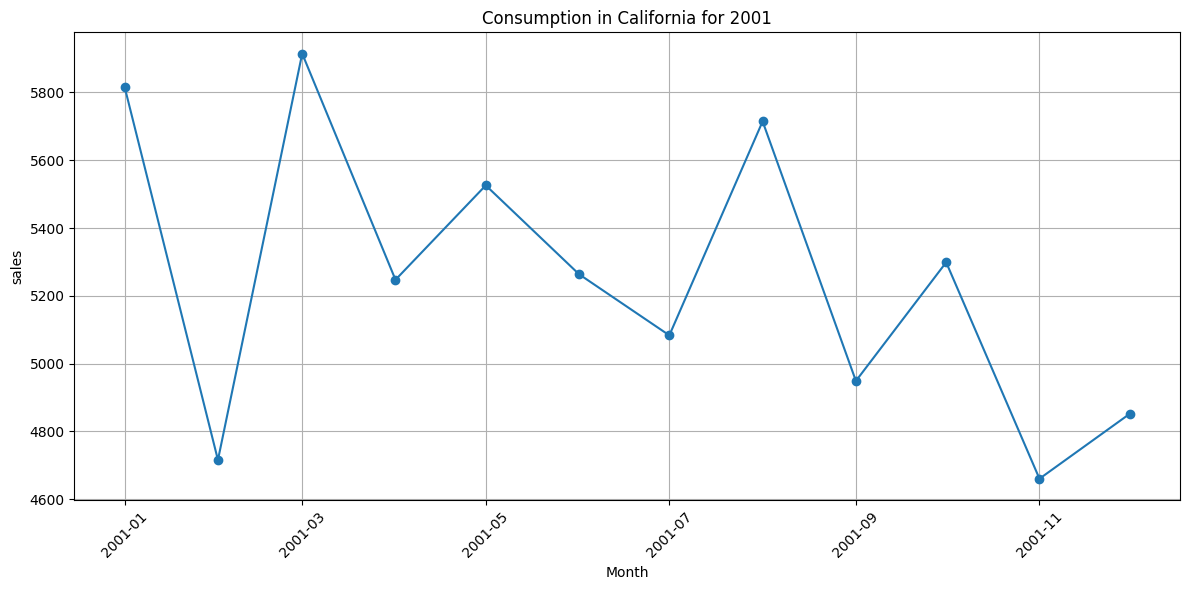

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_df(california_data, entry_name='value', year=None):
    """
    Plots the DataFrame entries against time.

    :param california_data: DataFrame containing the data to plot.
    :param entry_name: Name of the column to plot.
    :param year: The year to which to restrict the plot. If None, plots all data.
    """
    
    # Convert 'period' to datetime to ensure proper sorting.
    california_data['period'] = pd.to_datetime(california_data['period'], format='%Y-%m')
    
    # If a year is specified, filter the DataFrame to only include that year.
    if year is not None:
        california_data = california_data[california_data['period'].dt.year == year]
    
    # Convert entry_name column to float to ensure proper plotting.
    california_data[entry_name] = california_data[entry_name].apply(convert_to_float)

    # Sort the DataFrame based on the 'period' column in ascending order.
    california_data_sorted = california_data.sort_values(by='period', ascending=True)

    # Plotting the entry_name column against the 'period' column.
    plt.figure(figsize=(12, 6))
    plt.plot(california_data_sorted['period'], california_data_sorted[entry_name], marker='o')
    plt.title(f'Consumption in California for {year}' if year else 'Consumption in California')
    plt.xlabel('Month')
    plt.ylabel(f'{entry_name}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the layout to make room for the x-axis labels.

    # Show the plot.
    plt.show()

# Example usage:
# Replace 'residential_df' with your actual DataFrame variable name and specify the year you want to plot.
plot_df(industrial_df, 'sales',2001)


In [29]:
industrial_df

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
4,2001-01-01,CA,California,IND,industrial,5815.77103,million kilowatthours
10,2001-02-01,CA,California,IND,industrial,4715.79261,million kilowatthours
15,2001-03-01,CA,California,IND,industrial,5914.54295,million kilowatthours
22,2001-04-01,CA,California,IND,industrial,5247.34233,million kilowatthours
28,2001-05-01,CA,California,IND,industrial,5525.84378,million kilowatthours
...,...,...,...,...,...,...,...
1414,2020-08-01,CA,California,IND,industrial,4614.58141,million kilowatthours
1416,2020-09-01,CA,California,IND,industrial,4441.7251,million kilowatthours
1426,2020-10-01,CA,California,IND,industrial,4280.45481,million kilowatthours
1432,2020-11-01,CA,California,IND,industrial,3597.63788,million kilowatthours


In [30]:
industrial_monthly_index = normalize_values_by_quarter(industrial_df,'sales')
with open('industrial_monthly_index.json', 'w') as f:
    json.dump(industrial_monthly_index, f)

In [31]:
residential_monthly_index = normalize_values_by_quarter(residential_df,'sales')


/var/folders/ll/cq_mlqg56938kmwh8dys19n80000gn/T/ipykernel_67049/2877745581.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = pd.to_datetime(df['period'], errors='coerce')  # Coerce malformed dates to NaN


In [32]:
with open('residential_monthly_index.json', 'w') as f:
    json.dump(residential_monthly_index, f)